In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
scan_results_files = [
    '2022-11-02_08-02-10_results.json',
    '2022-11-02_18-08-30_results.json',
    '2022-11-03_01-20-56_results.json',
    '2022-11-03_20-57-17_results.json',
    '2022-11-03_21-24-03_results.json',
    '2022-11-03_22-49-58_results.json',
]

In [3]:
w100_results = []; w200_results = []
for filename in scan_results_files:
    with open(f'../results/{filename}') as f:
        data = json.load(f)
        configs = data[0]['configs']
        if configs['width'] == 100:
            w100_results.append(data)
        else:
            w200_results.append(data)

In [4]:
best_mapes = {
    'OBJ1': 0.017,
    'OBJ2': 0.018,
    'OBJ3': 0.013,
    'OBJ4': 0.048,
    'OBJ5': 0.117,
    'OBJ6': 0.115,
}

In [5]:
def learning_rate_to_xval(learning_rate):
    learning_rate = round(learning_rate, 4)
    if learning_rate == 0.001:
        return -1.
    elif learning_rate == 0.005:
        return 0.
    elif learning_rate == 0.01:
        return 1.
    
def learning_rate_to_color(learning_rate):
    learning_rate = round(learning_rate, 4)
    if learning_rate == 0.001:
        return 'r'
    elif learning_rate == 0.005:
        return 'g'
    elif learning_rate == 0.01:
        return 'b'

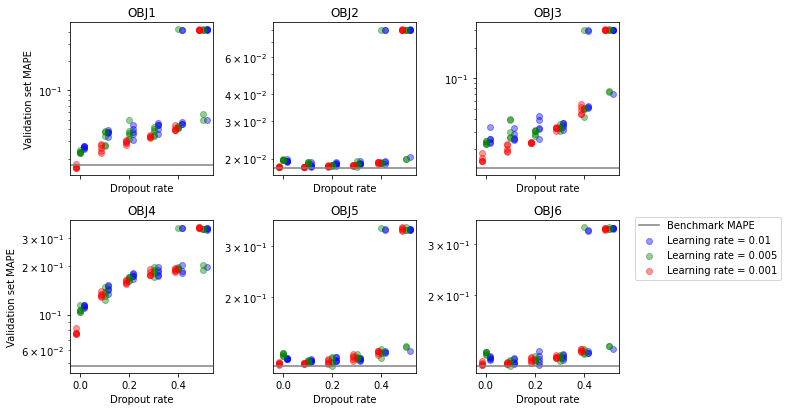

In [28]:
results_list = w100_results

fig, axs = plt.subplots(2, 3, figsize=(11, 6), sharex=True)

# fig.supylabel('Validation set MAPE')
for i in range(1, 7):
    ax = axs.flatten()[i-1]
    ax.axhline(best_mapes[f'OBJ{i}'], label=('Benchmark MAPE' if i == 1 else ''), color='gray')
    ax.set_title(f'OBJ{i}')
    ax.set_xlabel('Dropout rate')
    ax.set_ylabel('Validation set MAPE' if i % 3 == 1 else '')
    ax.set_yscale('log')
    #ax.set_ylim(0.0099, 0.5)

for res in results_list:
    for j, d in enumerate(res):
        configs = d['configs']
        results = d['results']
        dropout_rate = configs['dropout_rate']
        learning_rate = configs['learning_rate']

        for i in range(1, 7):
            ax = axs.flatten()[i-1]

            obj_results = results['by_response'][f'OBJ{i}']
            mape_val = obj_results['mape_val']

            ax.scatter(
                [dropout_rate + learning_rate_to_xval(learning_rate)*0.015]*5,
                mape_val, color=learning_rate_to_color(learning_rate), alpha=0.4, 
                label=(f'Learning rate = {round(learning_rate, 4)}' if (j == 0 and i == 1) else ''))

fig.tight_layout(rect=[0, 0.03, 0.8, 1.])
#fig.suptitle(f"Width {configs['width']}, depth {configs['depth']}, sigmoid activation, 1024 batch size ")
fig.legend(loc='upper left', bbox_to_anchor=(.8, 0.5))


plt.savefig('../img/dropout_results_placeholder.png', dpi=500)
plt.show()

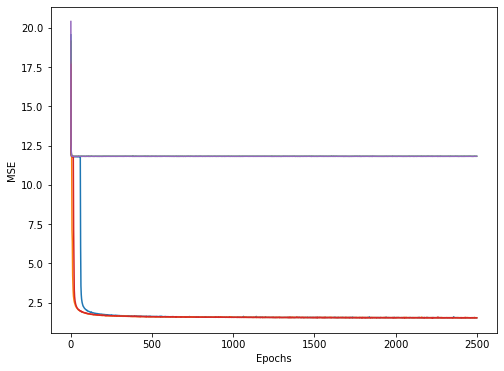

In [7]:
import numpy as np

fig, ax = plt.subplots(1, 1, figsize=(8, 6))

for results_list in w100_results:
    for res in results_list:
        configs = res['configs']
        learning_rate = configs['learning_rate']
        dropout_rate = configs['dropout_rate']
        
        if dropout_rate == 0.4 and round(learning_rate, 4) == 0.01:
            for i in range(5):
                ax.plot(list(range(2500)), res['results']['total']['training_losses'][i])
                
ax.set_xlabel('Epochs')
ax.set_ylabel('MSE')
plt.show()

In [8]:
import numpy as np
import seaborn as sns

fig, axs = plt.subplots(1, 2, figsize=(14, 5))

for results_list in w100_results:
    for res in results_list:
        configs = res['configs']
        learning_rate = configs['learning_rate']
        dropout_rate = configs['dropout_rate']
        
        if dropout_rate == 0.4 and round(learning_rate, 4) == 0.01:
            for i in range(5):
                losses = res['results']['total']['training_losses'][i]
                axs[0].plot(list(range(2500)), losses)
                bins = np.linspace(-0.03, 0.06, 50)
                sns.kdeplot(np.diff(losses)[-500:], ax=axs[1]) 
                
axs[0].set_ylim(11.75, 11.85)
axs[0].set_xlim(0, 100)
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('MSE')
plt.show()

ModuleNotFoundError: No module named 'seaborn'

In [ ]:
import numpy as np

fig, ax = plt.subplots(1, 1, figsize=(8, 6))

for results_list in w100_results:
    for res in results_list:
        configs = res['configs']
        learning_rate = configs['learning_rate']
        dropout_rate = configs['dropout_rate']
        
        if dropout_rate == 0.4 and round(learning_rate, 4) == 0.005:
            for i in range(5):
                ax.plot(list(range(2500)), res['results']['total']['training_losses'][i])
                
ax.set_ylim(1.45, 1.75)